 # Predicting H1N1 and seasonal Vaccine Uptake

This project aims to predict the likelihood of individuals receiving H1N1 and seasonal flu vaccine using demographic, behavioral, and opinion-based features.


# Project Overview

We aim to use data science to understand what drives H1N1 and seasonal flu vaccine uptake. By modeling the likelihood of individuals getting vaccinated based on demographics, health behaviors, and beliefs, we can guide public health organizations in developing more effective awareness and outreach strategies.

# Business Understanding

Vaccination is one of the most effective public health strategies for controlling infectious diseases. However, vaccine hesitancy, the reluctance or refusal to get vaccinated despite availability, continues to undermine public health efforts globally. As seen during the H1N1 influenza pandemic and more recently during COVID-19, even when vaccines are accessible, uptake varies widely across different groups due to factors like trust, misinformation, access, cultural beliefs, and risk perception.

This project aims to provide a data driven foundation for understanding who gets vaccinated by analyzing data collected during the 2009 H1N1 pandemic. The project will explore how individual demographics, beliefs, and behaviors correlate with uptake of both the H1N1 and seasonal flu vaccines.

The insights derived can support:

1. Public health officials, who need to allocate resources strategically and tailor messages to different populations.

2. Health communication teams, designing campaigns based on real patterns of hesitancy.

3. Policy makers, seeking to improve vaccine coverage through informed interventions.

By building a predictive model that estimates the likelihood of vaccine uptake using survey data, this project not only enhances our understanding of past behavior but also contributes tools that can be adapted to modern vaccine campaigns.

### Stakeholders:

Public Health Agencies (e.g., CDC, WHO): For targeting vaccine campaigns.

Policy Makers: To allocate resources more effectively.

NGOs and Outreach Groups: To understand barriers to vaccine uptake in different communities.

### Real World Problem:

The H1N1 flu commonly known as "swine flu", posed a global health threat in 2009, causing an estimated 151,000 to 575,000 deaths in its first year. Despite the availability of vaccines, many people chose not to get vaccinated. Vaccine hesitancy undermines public health efforts and therefore understanding who is most or least likely to get vaccinated helps improve response in future pandemics

# Business Goal

To develop a predictive model that accurately identifies people likely to receive the H1N1 and seasonal flu vaccine using survey data on:

Personal health behavior

Beliefs and perceptions

Socio demographic characteristic

# Data Sources

Source: National 2009 H1N1 Flu Survey (NHFS) (https://www.drivendata.org/competitions/66/flu-shot-learning/data/)

The data includes:

training_set_features.csv (http://localhost:8890/edit/H1N1_vaccine_prediction/data/training_set_features.csv)

training_set_labels.csv (http://localhost:8890/edit/H1N1_vaccine_prediction/data/training_set_features.csv)

test_set_features.csv for final predictions(http://localhost:8890/edit/H1N1_vaccine_prediction/data/test_set_features.csv)

submission_format.csv for submitting results(http://localhost:8890/edit/H1N1_vaccine_prediction/data/submission_format.csv)

## Features include:

Age group, income level, education

Behavioral features (doctor visits, insurance, employment)

Opinions (vaccine efficacy, media influence)

Target labels: h1n1_vaccine, seasonal_vaccine

# STEP 1: Data Cleaning, Encoding, and Scaling

### 1a. Data Loading

In [173]:
# Importing the necessary libraries

#1. Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#2. Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

#3. Model selection and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix, 
    ConfusionMatrixDisplay, 
    roc_curve, 
    roc_auc_score
)

#4. Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

In [145]:
# Loading the necessary DataSet
features_df = pd.read_csv('data/training_set_features.csv')
labels_df = pd.read_csv('data/training_set_labels.csv')
print(features_df)


       respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0                  0           1.0             0.0                        0.0   
1                  1           3.0             2.0                        0.0   
2                  2           1.0             1.0                        0.0   
3                  3           1.0             1.0                        0.0   
4                  4           2.0             1.0                        0.0   
...              ...           ...             ...                        ...   
26702          26702           2.0             0.0                        0.0   
26703          26703           1.0             2.0                        0.0   
26704          26704           2.0             2.0                        0.0   
26705          26705           1.0             1.0                        0.0   
26706          26706           0.0             0.0                        0.0   

       behavioral_avoidance

In [146]:
print(labels_df)

       respondent_id  h1n1_vaccine  seasonal_vaccine
0                  0             0                 0
1                  1             0                 1
2                  2             0                 0
3                  3             0                 1
4                  4             0                 0
...              ...           ...               ...
26702          26702             0                 0
26703          26703             0                 0
26704          26704             0                 1
26705          26705             0                 0
26706          26706             0                 0

[26707 rows x 3 columns]


In [147]:
# Merge features and labels for cleaning and exploration
merge_df = features_df.merge(labels_df, on ="respondent_id")
print(merge_df)

       respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0                  0           1.0             0.0                        0.0   
1                  1           3.0             2.0                        0.0   
2                  2           1.0             1.0                        0.0   
3                  3           1.0             1.0                        0.0   
4                  4           2.0             1.0                        0.0   
...              ...           ...             ...                        ...   
26702          26702           2.0             0.0                        0.0   
26703          26703           1.0             2.0                        0.0   
26704          26704           2.0             2.0                        0.0   
26705          26705           1.0             1.0                        0.0   
26706          26706           0.0             0.0                        0.0   

       behavioral_avoidance

### 1b. Data Exploration
To get basic information and null values for the merged dataset

In [148]:
# Identify columns with missing values or wrong data types eg numbers stored as texts.
print(merge_df.info()) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [149]:
#Descriptive statistics for numeric columns only. i.e understand distributions, skew, outliers, and value ranges
print(merge_df.describe()) 

       respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
count   26707.000000  26615.000000    26591.000000               26636.000000   
mean    13353.000000      1.618486        1.262532                   0.048844   
std      7709.791156      0.910311        0.618149                   0.215545   
min         0.000000      0.000000        0.000000                   0.000000   
25%      6676.500000      1.000000        1.000000                   0.000000   
50%     13353.000000      2.000000        1.000000                   0.000000   
75%     20029.500000      2.000000        2.000000                   0.000000   
max     26706.000000      3.000000        2.000000                   1.000000   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
count          26499.000000          26688.000000           26665.000000   
mean               0.725612              0.068982               0.825614   
std                0.446214              0

In [150]:
#Identify missing (NaN) values in each column
print(merge_df.isnull().sum()) .

SyntaxError: invalid syntax (<ipython-input-150-b383a2a78fb5>, line 2)

In [151]:
# Identify the percentage of missing values for each column
missing_percent = merge_df.isnull().mean() * 100
print(missing_percent.sort_values(ascending=False))

employment_occupation          50.436215
employment_industry            49.912008
health_insurance               45.957989
income_poverty                 16.561201
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
rent_or_own                     7.645936
employment_status               5.477965
marital_status                  5.272026
education                       5.268282
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
opinion_seas_sick_from_vacc     2.010709
opinion_seas_risk               1.924589
opinion_seas_vacc_effective     1.729884
opinion_h1n1_sick_from_vacc     1.479013
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
household_adults                0.932340
household_children              0.932340
behavioral_avoidance            0.778822
behavioral_touch_face           0.479275
h1n1_knowledge                  0.434343
h1n1_concern    

In [152]:
#Confirm columns in the merged dataset to aid in handling of missing values
print(merge_df.columns.tolist())

['respondent_id', 'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 'household_adults', 'household_children', 'employment_industry', 'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine']


### 1c. Handling missing Values

Before building any machine learning models, it's important to deal with missing values in the dataset to avoid errors and improve prediction quality.

1. Drop Highly Missing Columns
Columns like 'employment_occupation' and 'employment_industry' , had over 49% missing values. Since this is a large portion of missing data, trying to fill them in would likely introduce noise or bias. Therefore, we drop these two columns from the dataset.

2. Fill categorical columns with "Unknown"
For categorical columns like 'marital_status', 'education', etc. with moderate missing data, we replace missing values with "Unknown". This keeps the data structure intact and avoids removing useful rows.

3. Fill Numerical columns with Median
For numerical columns like 'household_adults', 'household_children', etc. that have small amounts of missing data, we replace missing values with the median of the column. The median is less sensitive to outliers than the mean and helps maintain the distribution of the data.

This step prepares the dataset to be clean and complete for encoding, scaling, and modeling.

In [153]:
# Defining categorical and numerical columns with missing values
categorical_cols = [
    'education', 'income_poverty', 'marital_status', 'rent_or_own',
    'employment_status', 'health_insurance'
]

numerical_cols = [
    'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition',
    'child_under_6_months', 'health_worker', 'opinion_seas_sick_from_vacc',
    'opinion_seas_risk', 'opinion_seas_vacc_effective',
    'opinion_h1n1_sick_from_vacc', 'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk', 'household_adults', 'household_children',
    'behavioral_avoidance', 'behavioral_touch_face', 'h1n1_knowledge',
    'h1n1_concern', 'behavioral_large_gatherings', 'behavioral_outside_home',
    'behavioral_antiviral_meds', 'behavioral_wash_hands', 'behavioral_face_mask'
]

# Filling categorical columns with 'Uknown'
for col in categorical_cols:
    if col in merge_df.columns:
        merge_df[col].fillna('Unknown', inplace=True)

# Filling numerical columns with median
for col in numerical_cols:
    if col in merge_df.columns:
        merge_df[col].fillna(merge_df[col].median(), inplace=True)



In [154]:
 # Checking if any missing values remain in the DataFrame
missing_values_summary = merge_df.isnull().sum()

# Filtering and displaying only columns with missing values
missing_columns = missing_values_summary[missing_values_summary > 0]

if missing_columns.empty:
    print("No missing values remaining in the DataFrame.")
else:
    print("Missing values still present in the following columns:")
    print(missing_columns)


Missing values still present in the following columns:
employment_industry      13330
employment_occupation    13470
dtype: int64


In [155]:
print(merge_df)

       respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0                  0           1.0             0.0                        0.0   
1                  1           3.0             2.0                        0.0   
2                  2           1.0             1.0                        0.0   
3                  3           1.0             1.0                        0.0   
4                  4           2.0             1.0                        0.0   
...              ...           ...             ...                        ...   
26702          26702           2.0             0.0                        0.0   
26703          26703           1.0             2.0                        0.0   
26704          26704           2.0             2.0                        0.0   
26705          26705           1.0             1.0                        0.0   
26706          26706           0.0             0.0                        0.0   

       behavioral_avoidance

### 1d. Encoding categorical variables 

Our dataset contains several categorical features which machine learning models cannot understand directly, as they require numerical input. Therefore, we need to encode these features.

We'll use two types of encoding, depending on the nature of each feature:

1. Label Encoding 
Best for ordinal data (where order matters, like educational level).

2. One-Hot Encoding 
Best for nominal data (where there's no meaningful order, like race or region).

This process ensures that we properly represent categorical data without introducing misleading relationships between categories.

In [156]:
# Make a copy to avoid altering original data frame
df_encoded = merge_df.copy()

# 1.Label Encoding
label_columns = ['age_group', 'education']
le = LabelEncoder()
for col in label_columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# 2.One-Hot Encoding
onehot_columns = ['race', 'sex', 'marital_status', 'rent_or_own', 
               'income_poverty', 'employment_status', 
               'hhs_geo_region', 'census_msa']

df_encoded = pd.get_dummies(df_encoded, columns=onehot_columns, drop_first=True)

# Check result
df_encoded.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,1,0,0,1
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,1,0,0


In [157]:
# Handling 'health_insurance' missing values and encoding it

# Replace 'Missing' or any other missing indicators with 'Unknown'
df_encoded['health_insurance'] = df_encoded['health_insurance'].replace('Missing', 'Unknown')

# Convert entire column to string type to ensure uniformity
df_encoded['health_insurance'] = df_encoded['health_insurance'].astype(str)

# Now apply LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encoded['health_insurance'] = le.fit_transform(df_encoded['health_insurance'])


### 1f. Normalization

(also known as feature scaling) ensures that numeric values are on a similar scale so that no feature dominates others due to its magnitude.

This is Important since Machine learning algorithm like Logistic Regression is sensitive to feature scale.

For example:
household_adults: 0, 1, 2, 3+

opinion_h1n1_risk: ranges from 1.0 to 3.0 and/or

respondent_id: large, unique IDs (we’ll drop this since it's not useful for modeling)

Therefore, feeding raw values into models without scaling can negatively affect performance, especially for distance or gradient based algorithms.

In this project, we'll use StandardScaler from sklearn.preprocessing, which transforms features to have:

Mean = 0

Standard Deviation = 1

Note; Only numerical features will be scaled. Categorical features (including those encoded using Label or One-Hot Encoding) are not scaled.


In [158]:
# Make a copy to avoid changing the original data frame
df_scaled = df_encoded.copy()

# Drop respondent_id as its not useful for modeling
df_scaled.drop('respondent_id', axis=1, inplace=True)

# Select numeric columns to scale (excluding target variables)
numeric_cols = df_scaled.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Remove target columns from scaling
numeric_cols = [col for col in numeric_cols if col not in ['h1n1_vaccine', 'seasonal_vaccine']]

# Apply StandardScaler
scaler = StandardScaler()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

# Preview scaled data
df_scaled.head()


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA
0,-0.681849,-2.044279,-0.226293,-1.634957,-0.272097,-2.177944,-0.74589,1.404892,0.687870,-0.503893,...,0,0,0,0,0,0,1,0,0,1
1,1.518373,1.197027,-0.226293,0.611637,-0.272097,0.459149,-0.74589,1.404892,0.687870,-0.503893,...,0,0,0,0,0,0,0,0,0,0
2,-0.681849,-0.423626,-0.226293,0.611637,-0.272097,-2.177944,-0.74589,-0.711798,-1.453764,-0.503893,...,0,0,0,0,0,0,0,1,0,0
3,-0.681849,-0.423626,-0.226293,0.611637,-0.272097,0.459149,1.34068,-0.711798,-1.453764,-0.503893,...,0,0,0,1,0,0,0,0,1,0
4,0.418262,-0.423626,-0.226293,0.611637,-0.272097,0.459149,1.34068,-0.711798,0.687870,-0.503893,...,0,0,0,0,0,0,0,1,0,0


## STEP 2: Train - Test Split

Before building machine learning models, we'll divide our dataset into two parts:

Training set: Used to train the model.

Test set: Used to evaluate how well the model performs on unseen data.

This step is essential to avoid overfitting, I.e when a model learns the training data too well but performs poorly on new data.

We'll use an 80/20 split: 80% for training, 20% for testing, and set a random seed (random_state=42) to ensure reproducibility (meaning we’ll get the same split every time we run the code). 

In [159]:
# Define features (X) and targets (y)
X = df_encoded.drop(['h1n1_vaccine', 'seasonal_vaccine', 'respondent_id'], axis=1)
y = df_encoded[['h1n1_vaccine', 'seasonal_vaccine']]  # Multi-label targets

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Checking the shape of our splits
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(21365, 52) (5342, 52)
(21365, 2) (5342, 2)


In [160]:
# Replace any leftover 'Missing' strings with np.nan
X_train = X_train.replace('Missing', np.nan)
X_test = X_test.replace('Missing', np.nan)

# Impute again to convert those NaNs to something numerical
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)


In [161]:
# Check for any object (non-numeric) columns still in the data
print("Remaining non-numeric columns in X_train:")
print(X_train.select_dtypes(include=['object']).nunique())


Remaining non-numeric columns in X_train:
h1n1_concern                             4
h1n1_knowledge                           3
behavioral_antiviral_meds                2
behavioral_avoidance                     2
behavioral_face_mask                     2
behavioral_wash_hands                    2
behavioral_large_gatherings              2
behavioral_outside_home                  2
behavioral_touch_face                    2
doctor_recc_h1n1                         2
doctor_recc_seasonal                     2
chronic_med_condition                    2
child_under_6_months                     2
health_worker                            2
health_insurance                         3
opinion_h1n1_vacc_effective              5
opinion_h1n1_risk                        5
opinion_h1n1_sick_from_vacc              5
opinion_seas_vacc_effective              5
opinion_seas_risk                        5
opinion_seas_sick_from_vacc              5
age_group                                5
education   

In [162]:
X_train.drop(['employment_industry', 'employment_occupation'], axis=1, inplace=True, errors='ignore')
X_test.drop(['employment_industry', 'employment_occupation'], axis=1, inplace=True, errors='ignore')

In [163]:
print(X_train.select_dtypes(include=['object']).nunique())

h1n1_concern                            4
h1n1_knowledge                          3
behavioral_antiviral_meds               2
behavioral_avoidance                    2
behavioral_face_mask                    2
behavioral_wash_hands                   2
behavioral_large_gatherings             2
behavioral_outside_home                 2
behavioral_touch_face                   2
doctor_recc_h1n1                        2
doctor_recc_seasonal                    2
chronic_med_condition                   2
child_under_6_months                    2
health_worker                           2
health_insurance                        3
opinion_h1n1_vacc_effective             5
opinion_h1n1_risk                       5
opinion_h1n1_sick_from_vacc             5
opinion_seas_vacc_effective             5
opinion_seas_risk                       5
opinion_seas_sick_from_vacc             5
age_group                               5
education                               5
household_adults                  

Before fitting our model, we encountered a few critical issues that needed to be addressed to ensure clean numeric input for machine learning: I.e Unexpected String Values in Columns
- Some categorical columns (e.g , 'health_insurance') had string values like 'Missing' that were not properly converted to numeric)

These non-numeric strings caused the model to throw an error: 
- ValueError: could not convert string to float: 'Missing'.

To fix the error; 
1. We replaced all 'Missing' values with a placeholder (e.g , -1) and then applied LabelEncoder to convert them into clean numeric labels.

2. We dropped Columns like 'employment_industry' and 'employment_occupation' which had more than ~50% missing data, making them unreliable.

Finally, We double-checked the training features (X_train) to confirm that no string or object types remained.

This was necessary because scikit-learn models like LogisticRegression require purely numeric inputs and with these corrections, the dataset is now ready for modeling.

## STEP 3: MODELLING: Logistic Regression for Multi-label Classification

In this step, we build a predictive model using Logistic Regression to estimate the likelihood of individuals getting the H1N1 and seasonal flu vaccines.

Since we are predicting **two target variables** (`h1n1_vaccine` and `seasonal_vaccine`) at the same time, we'll use a **multi-label classification approach**. This requires wrapping our Logistic Regression model using `MultiOutputClassifier` from `sklearn`.

We will then evaluate the model performance using **accuracy score** and **classification report** for each vaccine type.


In [164]:
# Initialize logistic regression
base_model = LogisticRegression(max_iter=1000)

# Wrap it for multi-label classification
model = MultiOutputClassifier(base_model)

# Train the model
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate accuracy for both targets
print("Accuracy Score (H1N1):", accuracy_score(y_test['h1n1_vaccine'], y_pred[:, 0]))
print("Accuracy Score (Seasonal):", accuracy_score(y_test['seasonal_vaccine'], y_pred[:, 1]))

# More detailed classification report
print("\nH1N1 Vaccine Report:")
print(classification_report(y_test['h1n1_vaccine'], y_pred[:, 0]))

print("\nSeasonal Flu Vaccine Report:")
print(classification_report(y_test['seasonal_vaccine'], y_pred[:, 1]))


Accuracy Score (H1N1): 0.8446274803444402
Accuracy Score (Seasonal): 0.7817296892549607

H1N1 Vaccine Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4212
           1       0.71      0.45      0.55      1130

    accuracy                           0.84      5342
   macro avg       0.79      0.70      0.73      5342
weighted avg       0.83      0.84      0.83      5342


Seasonal Flu Vaccine Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      2891
           1       0.77      0.74      0.76      2451

    accuracy                           0.78      5342
   macro avg       0.78      0.78      0.78      5342
weighted avg       0.78      0.78      0.78      5342



#### Model Evaluation: Logistic Regression
After training a Logistic Regression model to predict both H1N1 and Seasonal flu vaccine uptake, we evaluated its performance using accuracy and classification reports.

**H1N1 Vaccine Prediction:**
Accuracy: 0.84

Observations:The model predicts individuals who did not receive the H1N1 vaccine (class 0) quite well with high precision (0.87) and recall (0.95).
However, it performs less accurately for those who did get the vaccine (class 1), with recall dropping to 0.45. This means the model struggles to identify vaccinated individuals.
 
**Seasonal Flu Vaccine Prediction:**
Accuracy: 0.78

Observations: The model has a more balanced performance across both classes(0 & 1).
Precision and recall are similar for both vaccinated and unvaccinated individuals, suggesting more reliable predictions.

**Insights:** Imbalance in class performance (especially for H1N1) shows that while overall accuracy is high, the model may be biased toward the majority class (unvaccinated individuals).

Further improvements could involve:

1. Handling class imbalance (e.g., using class_weight='balanced')

2. Trying more complex models (Random Forest, XGBoost)

3. Feature selection or engineering

### AUC (ROC Curve)

In multilabel classification tasks like this one (where we're predicting both H1N1 and seasonal flu vaccine uptake), accuracy alone is not enough. We also evaluate performance using **ROC AUC (Receiver Operating Characteristic - Area Under the Curve)**, which measures the model’s ability to rank predictions correctly, regardless of threshold.

ROC AUC tells us how well the model separates the positive and negative classes.

**AUC of 1.0 is perfect; 0.5 means random guessing.**


In [165]:
# Get predicted probabilities (for both labels)
y_proba = model.predict_proba(X_test)

# Extract probability of class 1 for each label
h1n1_probs = y_proba[0][:, 1]
seasonal_probs = y_proba[1][:, 1]

# Calculate AUC scores
h1n1_auc = roc_auc_score(y_test['h1n1_vaccine'], h1n1_probs)
seasonal_auc = roc_auc_score(y_test['seasonal_vaccine'], seasonal_probs)

# Display the results
print(f"AUC Score (H1N1): {h1n1_auc:.4f}")
print(f"AUC Score (Seasonal): {seasonal_auc:.4f}")


AUC Score (H1N1): 0.8451
AUC Score (Seasonal): 0.8503


These scores suggest the model performs well in distinguishing between vaccinated and unvaccinated individuals for both vaccines.

##### ROC Curve Plot

The ROC Curve shows the trade-off between **True Positive Rate** (Sensitivity) and **False Positive Rate** at various threshold settings.

A model that predicts perfectly would hug the top-left corner. The closer the curve is to the top-left, the better the performance.

Below are the ROC curves for both vaccine prediction models:


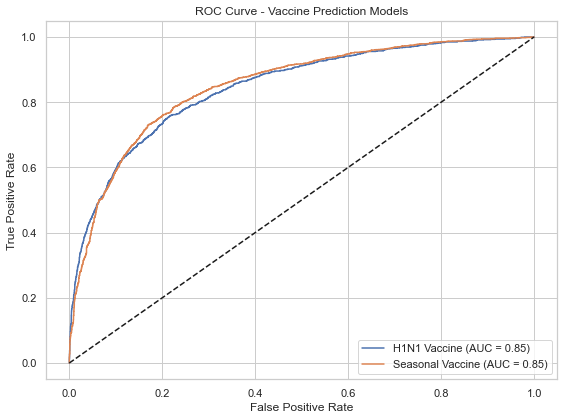

In [166]:
# Get predicted probabilities
h1n1_probs = model.predict_proba(X_test)[0][:, 1]
seasonal_probs = model.predict_proba(X_test)[1][:, 1]

# Compute ROC curve and AUC
fpr_h1n1, tpr_h1n1, _ = roc_curve(y_test['h1n1_vaccine'], h1n1_probs)
fpr_seasonal, tpr_seasonal, _ = roc_curve(y_test['seasonal_vaccine'], seasonal_probs)

h1n1_auc = roc_auc_score(y_test['h1n1_vaccine'], h1n1_probs)
seasonal_auc = roc_auc_score(y_test['seasonal_vaccine'], seasonal_probs)

# Plot
plt.figure(figsize=(8,6))
plt.plot(fpr_h1n1, tpr_h1n1, label=f'H1N1 Vaccine (AUC = {h1n1_auc:.2f})')
plt.plot(fpr_seasonal, tpr_seasonal, label=f'Seasonal Vaccine (AUC = {seasonal_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Vaccine Prediction Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


The ROC curves for both vaccine prediction models (H1N1 and Seasonal) indicate strong classification performance.

- Both models have AUC ~0.85 which suggests that they are highly effective at distinguishing between individuals who received the vaccine vs. those who did not.
This supports the reliability of our models in predicting vaccine uptake, even with class imbalance and complex feature patterns.

**Model Insights;** This level of performance can help public health officials focus outreach efforts more effectively. 
- Because our model can predict quite well who is likely or unlikely to get vaccinated, public health officials can use it to decide who needs more attention. For example, they can focus their time and resources on people the model says are less likely to get the vaccine, (maybe by sending reminders, running awareness campaigns, or answering their concerns directly).
- This helps make vaccine outreach smarter and more targeted, instead of treating everyone the same.


### Confusion Matrix

To better understand the performance of our classifiers, we'll use a confusion matrix which shows the number of:

- **True Positives (TP)**: Correctly predicted vaccinated individuals  
- **True Negatives (TN)**: Correctly predicted non-vaccinated individuals  
- **False Positives (FP)**: Predicted vaccinated, but they were not  
- **False Negatives (FN)**: Predicted not vaccinated, but they were  

This helps identify where the model is making errors, especially for imbalanced data.


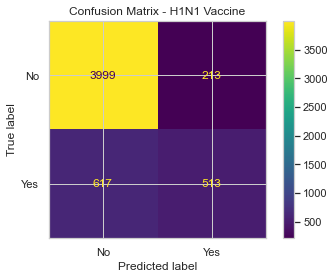

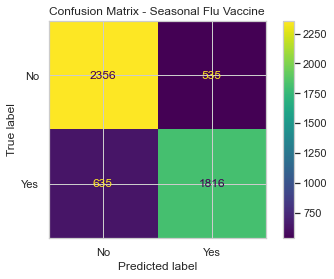

In [167]:
# Predict labels (hard predictions)
y_pred_h1n1 = model_h1n1.predict(X_test)
y_pred_seasonal = model_seasonal.predict(X_test)

# H1N1 Confusion Matrix
h1n1_cm = confusion_matrix(y_test['h1n1_vaccine'], y_pred_h1n1)
disp_h1n1 = ConfusionMatrixDisplay(confusion_matrix=h1n1_cm, display_labels=["No", "Yes"])
disp_h1n1.plot()
plt.title("Confusion Matrix - H1N1 Vaccine")
plt.show()

# Seasonal Flu Confusion Matrix
seasonal_cm = confusion_matrix(y_test['seasonal_vaccine'], y_pred_seasonal)
disp_seasonal = ConfusionMatrixDisplay(confusion_matrix=seasonal_cm, display_labels=["No", "Yes"])
disp_seasonal.plot()
plt.title("Confusion Matrix - Seasonal Flu Vaccine")

plt.show()

The confusion matrices provide a breakdown of how well our Logistic Regression model classified vaccine uptake for both H1N1 and Seasonal Flu.

**H1N1 Vaccine**
- True Negatives (3999): Majority of people who did not take the H1N1 vaccine were correctly predicted.
- True Positives (513): The model also correctly identified a decent portion of those who did take the vaccine.
- False Negatives (617): There were some cases where the model predicted “No” even though the individual did take the vaccine.
- False Positives (213): Fewer cases where the model incorrectly predicted “Yes”.

This shows that the model is strong at identifying non-vaccinated individuals, but slightly less accurate at identifying those who did get vaccinated.

**Seasonal Flu Vaccine**

The Seasonal flu model shows more balance, with reasonable accuracy for both classes, though still, we see more false negative cases where vaccinated individuals were missed by the model.

**Interpretation** 
- Both models perform better than random guessing.
- Most accurate at predicting who didn't get vaccinated.
- Performance can be further improved using more complex models (e.g., Random Forest, XGBoost).
These insights can guide targeted interventions, especially for groups that are often missed (false negatives).

## STEP 4: Exploratory Data Analysis

In this section, we’ll explore the cleaned dataset visually and statistically to better understand:

- The distribution of key features
- Relationships between variables
- Patterns that influence vaccine uptake

We’ll focus on:
- Target Variables: How many people took the H1N1 and seasonal flu vaccines
- Demographics: Vaccine uptake by age, sex, income, education
- Behavioral factors: Washing hands, avoiding gatherings, wearing masks
- Opinions and knowledge: Risk perception, vaccine effectiveness, trust in healthcare providers

### Visualization
#### 1. Vaccine uptake (Overall)
**Countplots: H1N1 and Seasonal Vaccine uptake**
- These plots help us see how many people took the vaccines vs. those who didn’t.

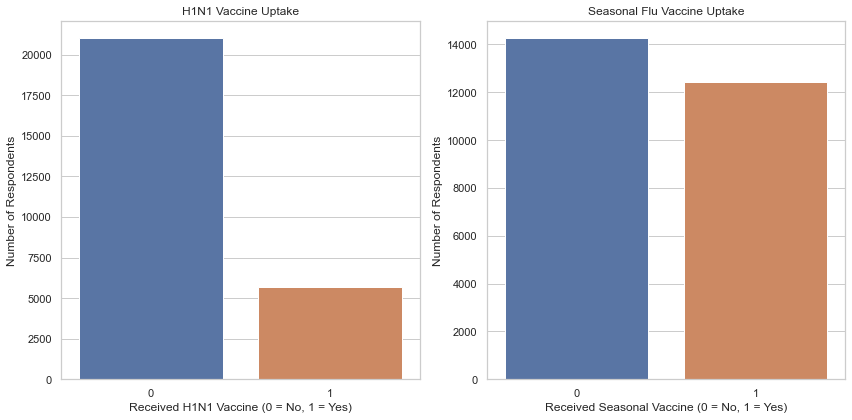

In [168]:
# Set style
sns.set(style="whitegrid")

# Create a figure with 1 row and 2 columns for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot H1N1 Vaccine Uptake
sns.countplot(ax=axes[0], x='h1n1_vaccine', data=merge_df)
axes[0].set_title("H1N1 Vaccine Uptake")
axes[0].set_xlabel("Received H1N1 Vaccine (0 = No, 1 = Yes)")
axes[0].set_ylabel("Number of Respondents")

# Plot Seasonal Vaccine Uptake
sns.countplot(ax=axes[1], x='seasonal_vaccine', data=merge_df)
axes[1].set_title("Seasonal Flu Vaccine Uptake")
axes[1].set_xlabel("Received Seasonal Vaccine (0 = No, 1 = Yes)")
axes[1].set_ylabel("Number of Respondents")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


The bar plots above display the distribution of vaccine uptake for both H1N1 and Seasonal Flu vaccines across all survey respondents.
- The majority of people did not receive the H1N1 vaccine.

This highlights low public uptake, which may have been due to concerns about safety, lack of perceived risk, or limited public trust at the time.

- Uptake for the seasonal flu vaccine is more balanced, with a relatively higher number of respondents reporting they got the shot.

This may reflect greater familiarity, routine availability, or stronger recommendations by healthcare providers.

#### 2. Vaccine Uptake by Key Feature

To understand what factors influence vaccine uptake, we examined H1N1 and seasonal flu vaccine uptake across some of the features like:
- income, education, perceived risk, belief in effectiveness, sex and age group.

This allows us to visually detect disparities and behavioral patterns that may inform targeted public health strategies.


**A. Vaccine uptake by income and Education**

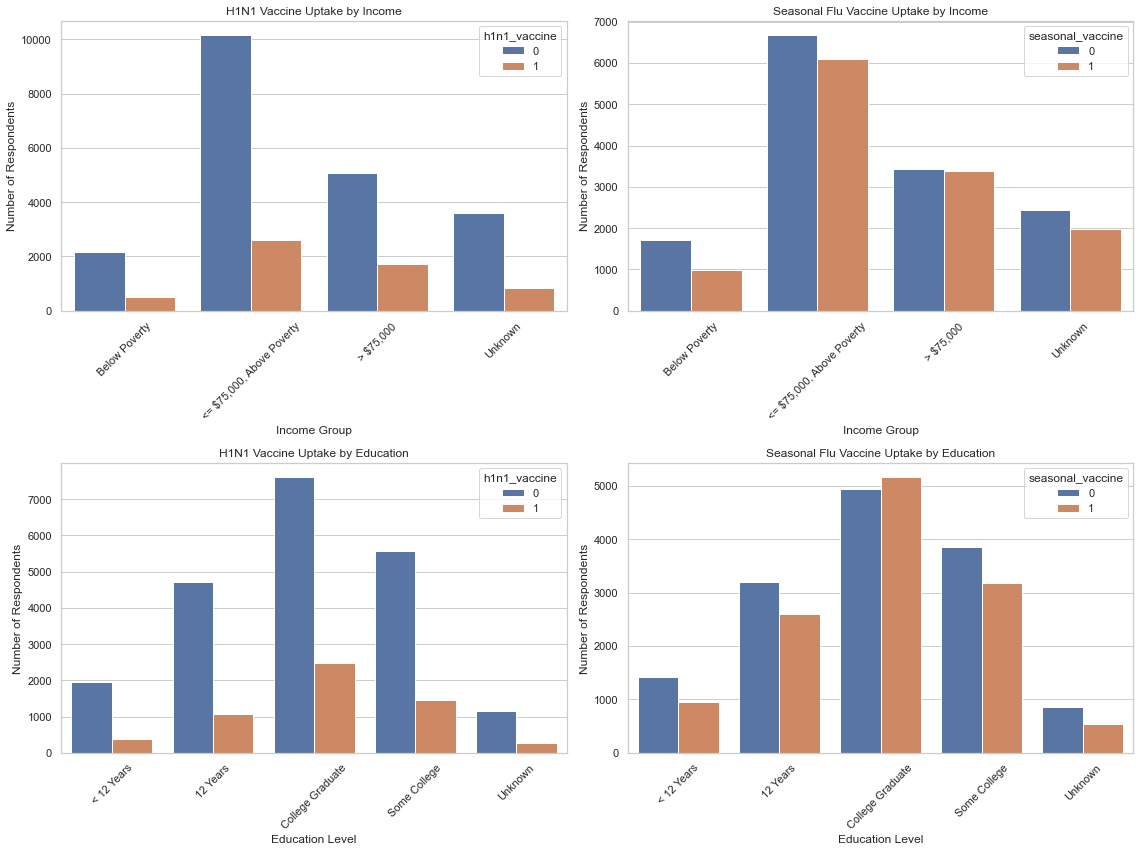

In [169]:
# Set the plot style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. H1N1 Vaccine by Income
sns.countplot(x='income_poverty', hue='h1n1_vaccine', data=merge_df, ax=axes[0, 0])
axes[0, 0].set_title("H1N1 Vaccine Uptake by Income")
axes[0, 0].set_xlabel("Income Group")
axes[0, 0].set_ylabel("Number of Respondents")

# 2. Seasonal Vaccine by Income
sns.countplot(x='income_poverty', hue='seasonal_vaccine', data=merge_df, ax=axes[0, 1])
axes[0, 1].set_title("Seasonal Flu Vaccine Uptake by Income")
axes[0, 1].set_xlabel("Income Group")
axes[0, 1].set_ylabel("Number of Respondents")

# 3. H1N1 Vaccine by Education
sns.countplot(x='education', hue='h1n1_vaccine', data=merge_df, ax=axes[1, 0])
axes[1, 0].set_title("H1N1 Vaccine Uptake by Education")
axes[1, 0].set_xlabel("Education Level")
axes[1, 0].set_ylabel("Number of Respondents")

# 4. Seasonal Vaccine by Education
sns.countplot(x='education', hue='seasonal_vaccine', data=merge_df, ax=axes[1, 1])
axes[1, 1].set_title("Seasonal Flu Vaccine Uptake by Education")
axes[1, 1].set_xlabel("Education Level")
axes[1, 1].set_ylabel("Number of Respondents")

# Rotate x labels for better readability
for ax in axes.flatten():
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Vaccine Uptake by Income & Education
- **Income:** Vaccine uptake increases with income. People below the poverty line or with unknown income show the lowest uptake, especially for H1N1. Higher income groups are more likely to get vaccinated.

- **Education:** Uptake is lowest among those with less than high school education and highest among college graduates. Education likely boosts health awareness and trust in vaccines.

**Insight:** Both income and education are strong predictors of vaccine behavior, influencing access, understanding, and willingness to get vaccinated.

**B. Vaccine uptake by Perceived Risk and Belief in Effectiveness**

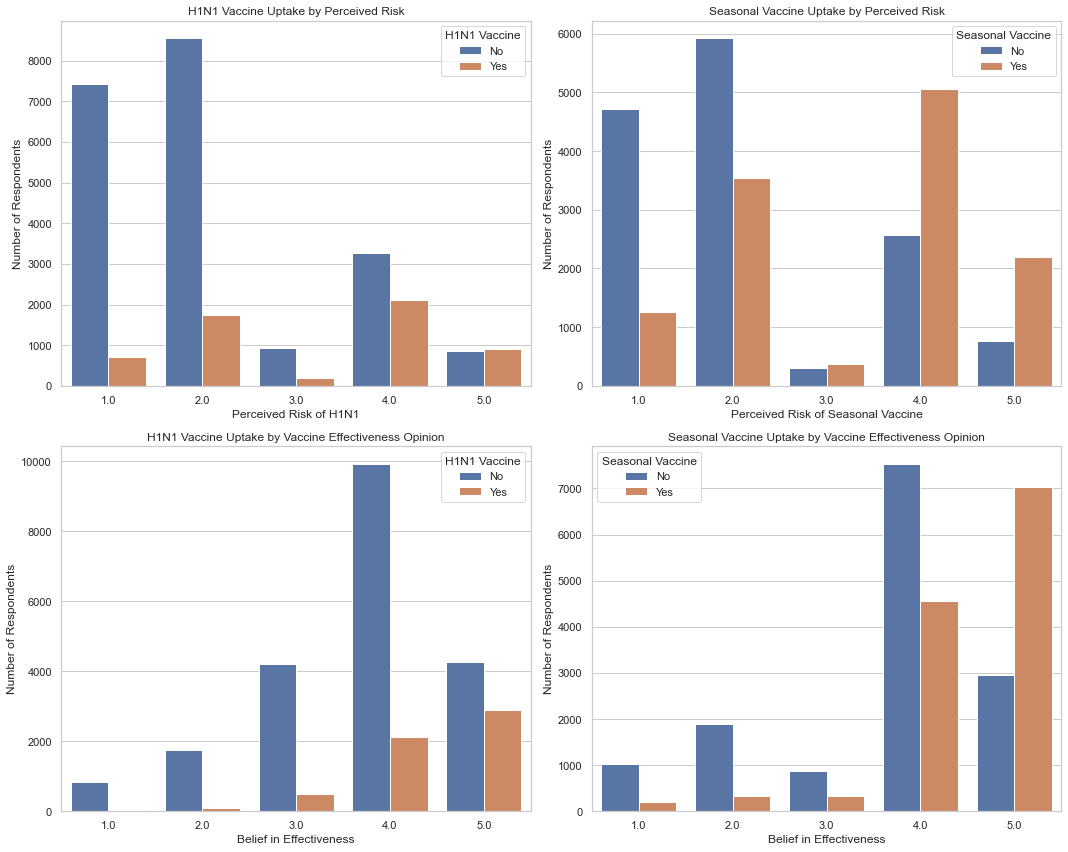

In [170]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. H1N1 Uptake by Perceived Risk
sns.countplot(ax=axes[0, 0], x='opinion_h1n1_risk', hue='h1n1_vaccine', data=merge_df)
axes[0, 0].set_title("H1N1 Vaccine Uptake by Perceived Risk")
axes[0, 0].set_xlabel("Perceived Risk of H1N1")
axes[0, 0].set_ylabel("Number of Respondents")
axes[0, 0].legend(title="H1N1 Vaccine", labels=["No", "Yes"])

# 2. Seasonal Uptake by Perceived Risk
sns.countplot(ax=axes[0, 1], x='opinion_seas_risk', hue='seasonal_vaccine', data=merge_df)
axes[0, 1].set_title("Seasonal Vaccine Uptake by Perceived Risk")
axes[0, 1].set_xlabel("Perceived Risk of Seasonal Vaccine")
axes[0, 1].set_ylabel("Number of Respondents")
axes[0, 1].legend(title="Seasonal Vaccine", labels=["No", "Yes"])

# 3. H1N1 Uptake by Belief in Effectiveness
sns.countplot(ax=axes[1, 0], x='opinion_h1n1_vacc_effective', hue='h1n1_vaccine', data=merge_df)
axes[1, 0].set_title("H1N1 Vaccine Uptake by Vaccine Effectiveness Opinion")
axes[1, 0].set_xlabel("Belief in Effectiveness")
axes[1, 0].set_ylabel("Number of Respondents")
axes[1, 0].legend(title="H1N1 Vaccine", labels=["No", "Yes"])

# 4. Seasonal Uptake by Belief in Effectiveness
sns.countplot(ax=axes[1, 1], x='opinion_seas_vacc_effective', hue='seasonal_vaccine', data=merge_df)
axes[1, 1].set_title("Seasonal Vaccine Uptake by Vaccine Effectiveness Opinion")
axes[1, 1].set_xlabel("Belief in Effectiveness")
axes[1, 1].set_ylabel("Number of Respondents")
axes[1, 1].legend(title="Seasonal Vaccine", labels=["No", "Yes"])

plt.tight_layout()
plt.show()



Vaccine Uptake by Perceived Risk and Effectiveness Belief

- Individuals who felt at higher risk of illness were more likely to get vaccinated, especially for both H1N1 and seasonal flu.
- Strong belief in vaccine effectiveness also led to significantly higher uptake, with the highest scores (5) showing the most positive behavior.

**Insight:** Both perceived vulnerability and trust in the vaccine’s effectiveness are powerful drivers of vaccination. These are crucial areas for public health education and targeted messaging.

**C. Vaccine uptake by Sex and Age**

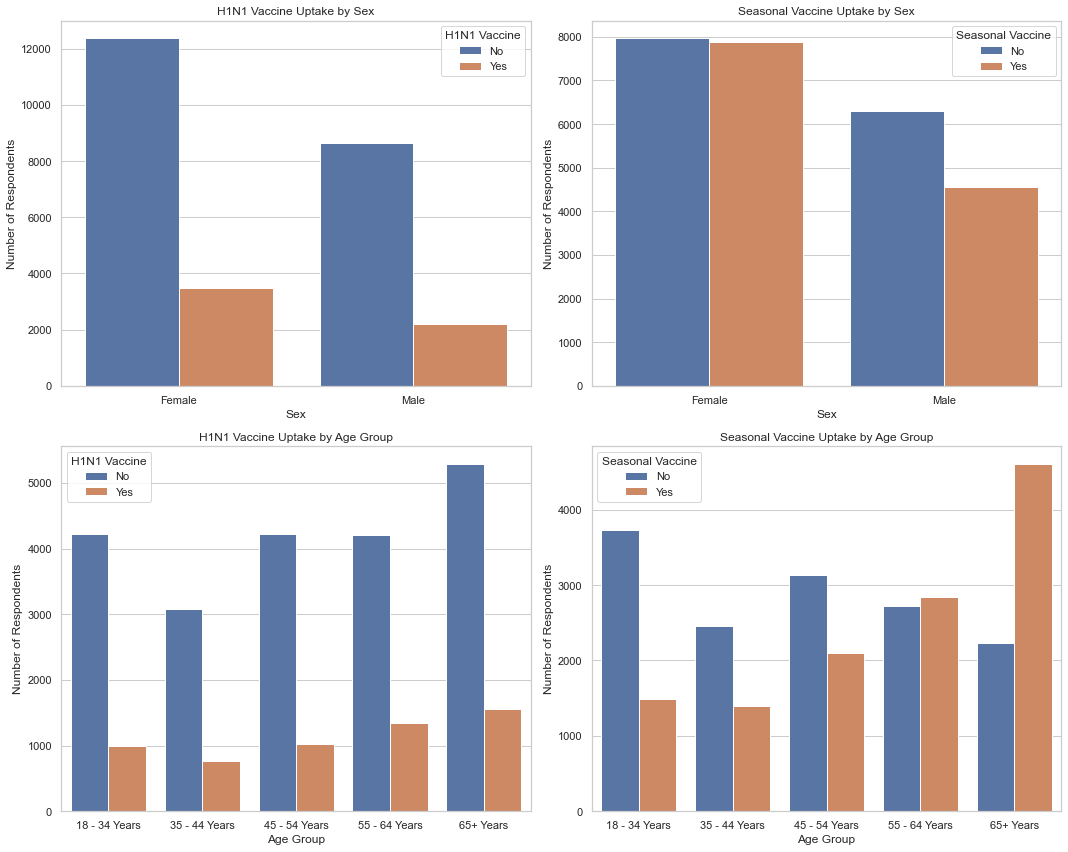

In [171]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. H1N1 Uptake by Sex
sns.countplot(ax=axes[0, 0], x='sex', hue='h1n1_vaccine', data=merge_df)
axes[0, 0].set_title("H1N1 Vaccine Uptake by Sex")
axes[0, 0].set_xlabel("Sex")
axes[0, 0].set_ylabel("Number of Respondents")
axes[0, 0].legend(title="H1N1 Vaccine", labels=["No", "Yes"])

# 2. Seasonal Uptake by Sex
sns.countplot(ax=axes[0, 1], x='sex', hue='seasonal_vaccine', data=merge_df)
axes[0, 1].set_title("Seasonal Vaccine Uptake by Sex")
axes[0, 1].set_xlabel("Sex")
axes[0, 1].set_ylabel("Number of Respondents")
axes[0, 1].legend(title="Seasonal Vaccine", labels=["No", "Yes"])

# 3. H1N1 Uptake by Age Group
age_order = ['18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '55 - 64 Years', '65+ Years']
sns.countplot(ax=axes[1, 0], x='age_group', hue='h1n1_vaccine', data=merge_df, order=age_order)
axes[1, 0].set_title("H1N1 Vaccine Uptake by Age Group")
axes[1, 0].set_xlabel("Age Group")
axes[1, 0].set_ylabel("Number of Respondents")
axes[1, 0].legend(title="H1N1 Vaccine", labels=["No", "Yes"])

# 4. Seasonal Uptake by Age Group
sns.countplot(ax=axes[1, 1], x='age_group', hue='seasonal_vaccine', data=merge_df, order=age_order)
axes[1, 1].set_title("Seasonal Vaccine Uptake by Age Group")
axes[1, 1].set_xlabel("Age Group")
axes[1, 1].set_ylabel("Number of Respondents")
axes[1, 1].legend(title="Seasonal Vaccine", labels=["No", "Yes"])

plt.tight_layout()
plt.show()


Vaccine Uptake by Sex and Age

- **Sex Differences:** Females were more likely to get vaccinated, especially for the seasonal flu while H1N1 uptake was generally low for both sexes but still slightly higher among females.

- **Age Differences:** H1N1 vaccine uptake remained low across age groups, though slightly higher for seniors (65+). Seasonal flu vaccine uptake increased with age, with the 65+ group showing the highest vaccination rate.

**Insight:** Both sex and age influence vaccine uptake behavior. Older adults and females are more likely to get vaccinated  thus highlighting the need for targeted outreach to younger and male populations.


## STEP 5: Advanced Modeling: Random Forest Classifier

After evaluating Logistic Regression as a baseline model, we'll now apply a Random Forest Classifier which is a powerful ensemble method that builds multiple decision trees and averages their predictions for better accuracy and robustness.

Random Forest is important as it;
- Handles both categorical and numerical features well.
- Works effectively on imbalanced datasets.
- Reduces the risk of overfitting.
- Can capture complex non-linear relationships.

In this step, we'll:
- Train a multi-output Random Forest model to predict both H1N1 and seasonal vaccine uptake.
- Evaluate it using Accuracy, F1-score, and AUC.
- Compare performance with the Logistic Regression baseline.

This helps us understand whether a more complex model improves prediction and supports better public health decision making.

In [174]:
# Create and fit Random Forest model
rf_model = MultiOutputClassifier(RandomForestClassifier(random_state=42))
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Accuracy Scores
h1n1_acc_rf = accuracy_score(y_test['h1n1_vaccine'], y_pred_rf[:, 0])
seasonal_acc_rf = accuracy_score(y_test['seasonal_vaccine'], y_pred_rf[:, 1])

print(f"Accuracy (H1N1): {h1n1_acc_rf:.4f}")
print(f"Accuracy (Seasonal): {seasonal_acc_rf:.4f}")

# Classification Reports
print("\nClassification Report (H1N1):")
print(classification_report(y_test['h1n1_vaccine'], y_pred_rf[:, 0]))

print("Classification Report (Seasonal):")
print(classification_report(y_test['seasonal_vaccine'], y_pred_rf[:, 1]))

# AUC Scores
h1n1_auc_rf = roc_auc_score(y_test['h1n1_vaccine'], rf_model.predict_proba(X_test)[0][:, 1])
seasonal_auc_rf = roc_auc_score(y_test['seasonal_vaccine'], rf_model.predict_proba(X_test)[1][:, 1])

print(f"AUC Score (H1N1): {h1n1_auc_rf:.4f}")
print(f"AUC Score (Seasonal): {seasonal_auc_rf:.4f}")


Accuracy (H1N1): 0.8510
Accuracy (Seasonal): 0.7836

Classification Report (H1N1):
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      4212
           1       0.75      0.44      0.56      1130

    accuracy                           0.85      5342
   macro avg       0.81      0.70      0.73      5342
weighted avg       0.84      0.85      0.84      5342

Classification Report (Seasonal):
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      2891
           1       0.77      0.75      0.76      2451

    accuracy                           0.78      5342
   macro avg       0.78      0.78      0.78      5342
weighted avg       0.78      0.78      0.78      5342

AUC Score (H1N1): 0.8576
AUC Score (Seasonal): 0.8528


## Conclusion and Strategic Recommendations

### Summary of Findings
Using survey data from the National 2009 H1N1 Flu Survey (NHFS), we built predictive models to identify individuals likely to receive the H1N1 and seasonal flu vaccines. 

The models used behavioral, perceptual, and socio-demographic features to make predictions.
- Logistic Regression served as our baseline model.
- Random Forest provided slightly better performance across most metrics.

**Key predictors of vaccine uptake included:**

- Perceived risk of getting sick
- Belief in vaccine effectiveness
- Income level and education
- Age and sex

### Key performance comparison of both the models used

**Random Forest vs Logistic Regression**

We evaluated two models, **Logistic Regression (baseline) and Random Forest** to predict H1N1 and Seasonal Flu vaccine uptake. 

Here are the notable differences to gain more insights on the two models used.

**Accuracy comparison**

| Vaccine Type | Logistic Regression | Random Forest |
|--------------|---------------------|----------------|
| H1N1         | 84.5%               | 85.1%          |
| Seasonal     | 78.2%               | 78.4%          |



- Random Forest slightly outperforms Logistic Regression in both vaccine predictions, particularly for H1N1.

**AUC Score (Area Under ROC Curve)**

| Vaccine Type | Logistic Regression | Random Forest |
|--------------|---------------------|----------------|
| H1N1         | 0.8451              | 0.8576         |
| Seasonal     | 0.8503              | 0.8528         |


- AUC scores improved marginally, indicating better discrimination between vaccinated and non-vaccinated individuals with Random Forest.

**Classification Reports (H1N1)**
- Precision and F1-scores are slightly better in Random Forest for class 1 (vaccinated), though recall remains a challenge due to class imbalance.

Logistic Regression had recall of 0.45; Random Forest improves this slightly to 0.44 but has better precision.

**Key insights**
- Random Forest shows consistent but modest improvements over Logistic Regression in predicting both vaccines.
It performs slightly better across most metrics, particularly in AUC and accuracy, making it a stronger candidate for our predictive goal.
However, challenges with predicting the minority class (those vaccinated) still persist, pointing to class imbalance as a key modeling challenge

### Strategic Recommendations
From our modeling, EDA, and performance evaluations, I recommend the following actionable steps to support vaccine outreach.

#### 1. Target Low-Income and Less-Educated Populations
Uptake was consistently lower among individuals below the poverty line and those with lower education. Tailored awareness campaigns, community outreach, and subsidized access should be prioritized in these groups.

#### 2. Promote Risk Awareness
Perceived risk of illness strongly influenced vaccine uptake. Public health messaging should focus on personal risk factors, especially for younger adults and those who feel “safe” or unlikely to be affected.

#### 3. Emphasize Vaccine Effectiveness
Belief in how well the vaccine works was a strong predictor of behavior. Campaigns should clearly explain the benefits, safety, and effectiveness of vaccines using relatable, evidence based messaging.

#### 4. Engage Healthcare Providers
Doctor recommendation was one of the top behavioral influencers. Initiatives that empower and encourage physicians to discuss vaccines with patients, especially during routine visits, could boost uptake.

#### 5. Tailor Messaging by Age and Sex
Younger individuals and males were less likely to get vaccinated. Targeted content that speaks directly to their concerns, lifestyles, and trusted information sources could help improve engagement.

#### 6. Monitor and Address Class Imbalance
Our models (particularly Logistic Regression) struggled with predicting the minority class (vaccinated individuals). Public health programs should monitor such imbalances to avoid under-serving specific subpopulations.

#### 7. Adopt Predictive Tools for Campaign Planning
Predictive models like the ones developed here can help prioritize which populations to focus on. These tools could be embedded into dashboards to support real time decision making during future vaccination drives.

